# Clustering


Clustering is an important unsupervised learning technique. 

We want to group or segment data points into subsets or "clusters", such that data points in the same cluster are more similar to each other than to those in other clusters.

Notice that clustering is different from classification. In classification, we have a set of labeled data points and we want to train a model to predict the labels of new data points. In clustering, we don't have labeled data points, and we want to group data points based on their similarity.


Example of Clustering:

- Grouping customers based on their purchase history for targeted marketing.

- Grouping documents based on their content.

- Grouping cells based on gene expression.



In this notebook, we will use the KMeans algorithm to cluster the data.

## K-means

Given $x_1, x_2, ..., x_n \in \mathbb{R}^d$, the KMeans algorithm partitions the data points into $k$ clusters, denoted by $S_1, S_2, ..., S_k$. Each cluster contain indices of data points in the cluster. For example, $S_1 = {1, 2, 3}$ means the first cluster contains the first three data points.

Using set notation, we can write the partition as
$S_1 \cup S_2 \cup ... \cup S_k = \{1, 2, ..., n\}$, 
where $S_i \cap S_j = \emptyset$ for $i \neq j$.


For each set $S_i$, we have a cluster center $c_i \in \mathbb{R}^d$. In total, we have $k$ cluster centers $c_1, c_2, ..., c_k \in \mathbb{R}^d$.

Therefore, the optimization problem is

$$ \min_{\substack{S_1, S_2, ..., S_k \\ c_1, c_2, ..., c_k}} \sum_{i=1}^{k} \sum_{j \in S_i} ||x_j - c_i||^2$$


We want to partition the data points into $k$ clusters to minimize the total distance between the data points and their corresponding cluster centers.




Note that, given a fixed partition, the optimal cluster centers are the means of the data points in the cluster.

$$ c_i = \frac{1}{|S_i|} \sum_{j \in S_i} x_j$$



The k-means algorithm is an iterative algorithm that alternates between

1. Given centers $c_1, c_2, ..., c_k$, assign $x_i$ to the cluster with the closest center

$$k = \arg \min_{j} ||x_i - c_j||^2$$


2. Updating the cluster centers to be the mean of the data points in the cluster

$$ c_i = \frac{1}{|S_i|} \sum_{j \in S_i} x_j$$

See visualization of the KMeans algorithm [here](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/).

While Kmeans is a popular clustering algorithm, it has some limitations. For example

- The number of clusters $k$ needs to be specified in advance

- The algorithm usually converges to a local minimum, which depends on the initial cluster centers

- The solution are always ``sphere-like'' clusters

See [comparison of the clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html)

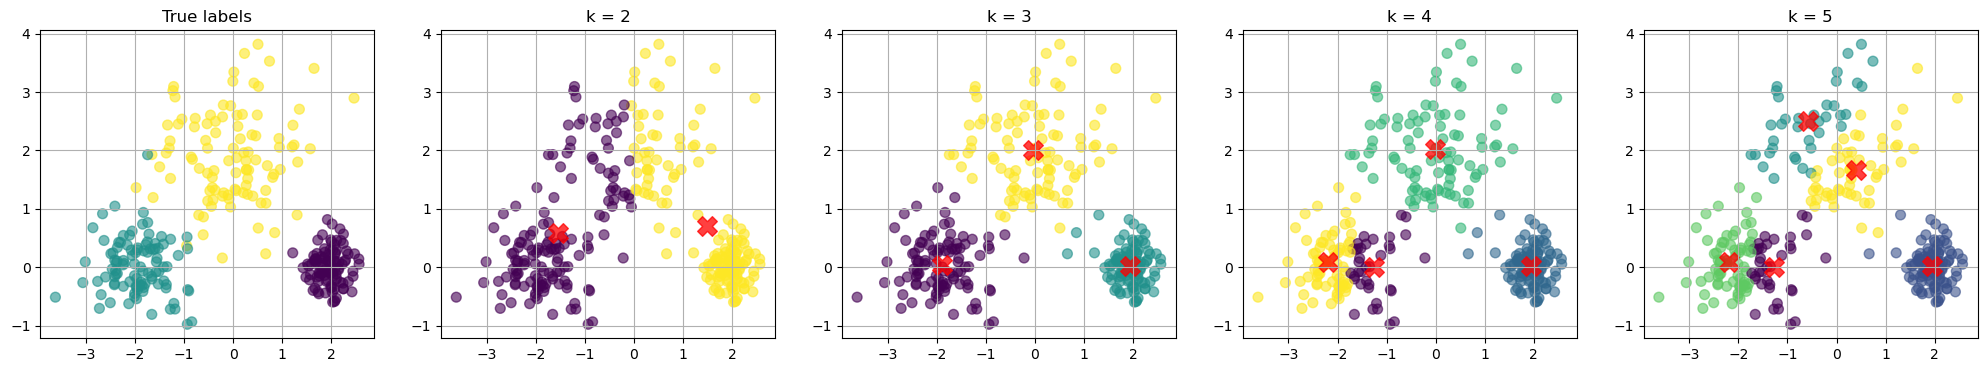

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
centers = [[2, 0], [-2, 0], [0, 2]]  # Mean positions of the Gaussians
cluster_std = [0.3, 0.5, 0.8]  # Standard deviations of the Gaussians
X, true_labels = make_blobs(n_samples=300, centers=centers, cluster_std=cluster_std, random_state=42)


# Specify the k values
k_values = [2, 3, 4, 5]
inertias = []

# Prepare the plot for clustering results
nfig = len(k_values)+1
fig, axes = plt.subplots(1, nfig , figsize=(5 * nfig, 4))

# Scatter plot for the true labels
scatter = axes[0].scatter(X[:, 0], X[:, 1], c=true_labels, s=50, cmap='viridis', alpha=0.6)
axes[0].set_title(f'True labels')
axes[0].grid(True)

# Apply k-Means for specified k values and visualize
for i in range(1,nfig):
    ax = axes[i]
    
    k = k_values[i-1]
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    y_kmeans = kmeans.predict(X)

    # Scatter plot for each k
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.6)
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Mark the centroids
    ax.set_title(f'k = {k}')
    ax.grid(True)



**How to choose the best k value?**

There is no definitive answer to this question. We can plot the loss as a function $k$. We know that the loss will decrease as we increase $k$.

Usually, we want to find the "elbow", after which increase $k$ gives diminishing improvement in the loss.



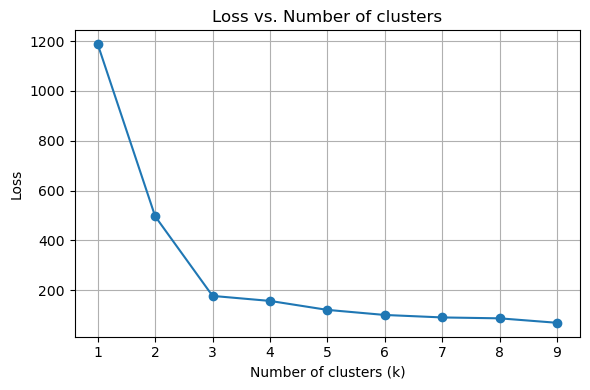

In [2]:

# Range of k values
k_values = range(1, 10)
inertias = []

# Apply k-Means for different values of k and record the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plotting the results
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Loss (inertia) plot
ax.plot(k_values, inertias, marker='o')
ax.set_title('Loss vs. Number of clusters')
ax.set_xlabel('Number of clusters (k)')
ax.set_ylabel('Loss')
ax.grid(True)

plt.tight_layout()
plt.show()


## K-Means clustering with 2 circles

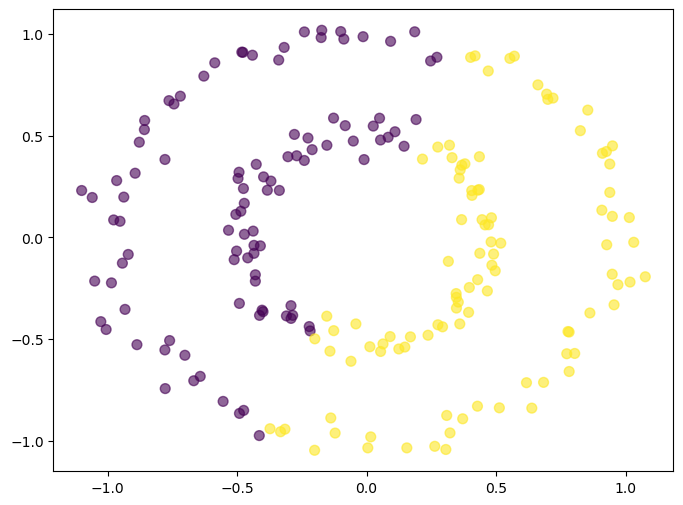

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csgraph
from scipy.linalg import eigh

# 1. Generate two-circle dataset
X, y = make_circles(n_samples=200, factor=0.5, noise=0.05, random_state=0)


# kmeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)

# Spectral clustering

In K-means, we use the Euclidean distance to measure "similarity". However, there can be other notions of similarity. For example, we can create a graph where nodes are data points, and we connect each node to its $k$ nearest neighbors. We can also assign weights to the edges based on the distance between the nodes.




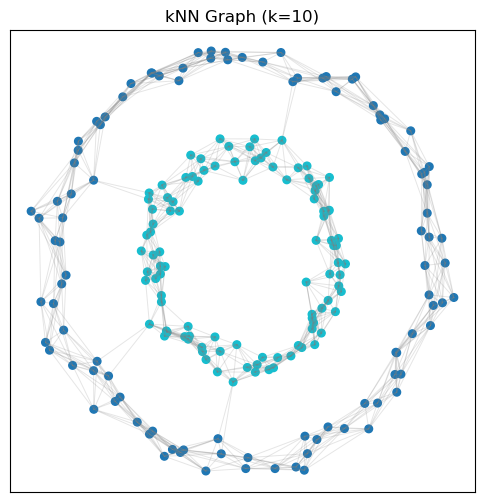

In [17]:
# Construct kNN kernel similarity matrix
k = 10
A = kneighbors_graph(X, n_neighbors=k, mode='connectivity', include_self=False)
A = 0.5 * (A + A.T)  # Make symmetric

# Visualize the graph
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', s=30)
for i in range(X.shape[0]):
    for j in range(i+1, X.shape[0]):
        if A[i, j] > 0:
            ax.plot([X[i, 0], X[j, 0]], [X[i, 1], X[j, 1]], color='gray', alpha=0.2, linewidth=0.7)
ax.set_title('kNN Graph (k=10)')
ax.set_xticks([])
ax.set_yticks([])
plt.show()


Imagine walking on this graph. Then the distance between two points can be defined as the shortest path between them. 


We can define the unnormalized graph Laplacian as

$$ L = D - A $$

where $D$ is the degree matrix (a diagonal matrix where $D_{ii}$ is the degree of node $i$) and $A$ is the adjacency matrix (where $A_{ij}$ is the weight of the edge between nodes $i$ and $j$). The eigenvector of the graph Laplacian is can be a powerful feature. The first eigenvector (corresponding to the smallest eigenvalue) is constant, and the second eigenvector can be used to partition the graph into two parts.

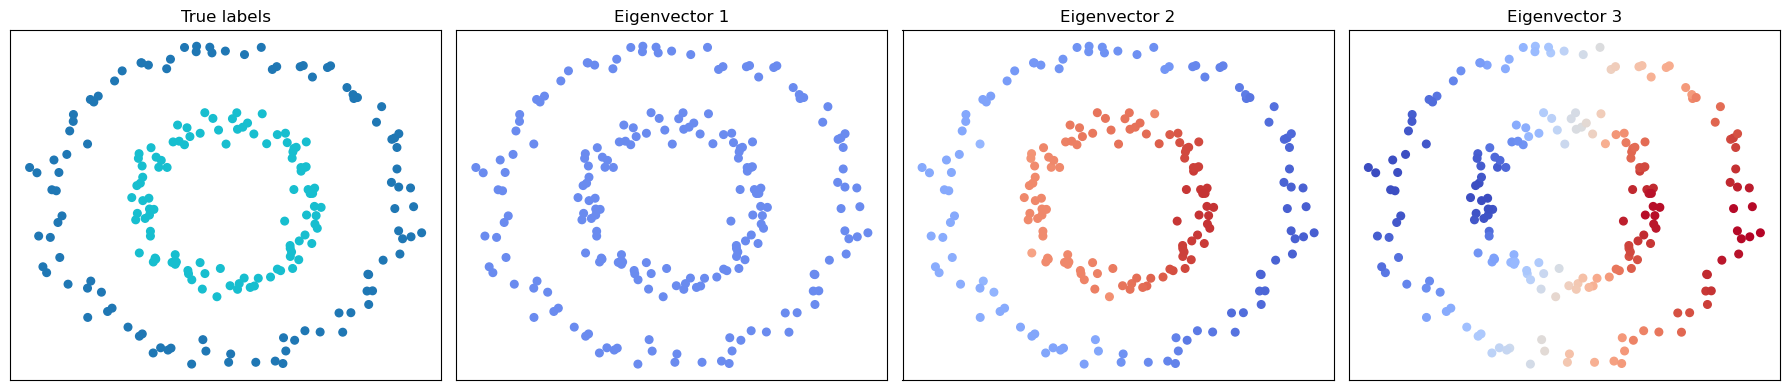

In [ ]:

# Compute UNnormalized Laplacian
L = csgraph.laplacian(A, normed=False)

# Compute the first few eigenvectors (smallest eigenvalues)
vals, vecs = eigh(L.toarray())


# Find global min/max for the first three nontrivial eigenvectors
vmin = np.min(vecs[:, :3])
vmax = np.max(vecs[:, :3])

# Plot the data colored by the first few nontrivial eigenvectors, using the same color scale
fig, axes = plt.subplots(1, 4, figsize=(18, 4))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', s=30)
axes[0].set_title('True labels')
for i in range(1, 4):
    axes[i].scatter(X[:, 0], X[:, 1], c=vecs[:, i-1], cmap='coolwarm', s=30, vmin=vmin, vmax=vmax)
    axes[i].set_title(f'Eigenvector {i}')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

In spectral clustering, we use the eigenvectors of the graph Laplacian to perform clustering. The eigenvectors of the graph Laplacian can be used to embed the data points into a lower-dimensional space, where we can then apply K-means clustering.

Text(0.5, 1.0, 'Spectral Clustering Results')

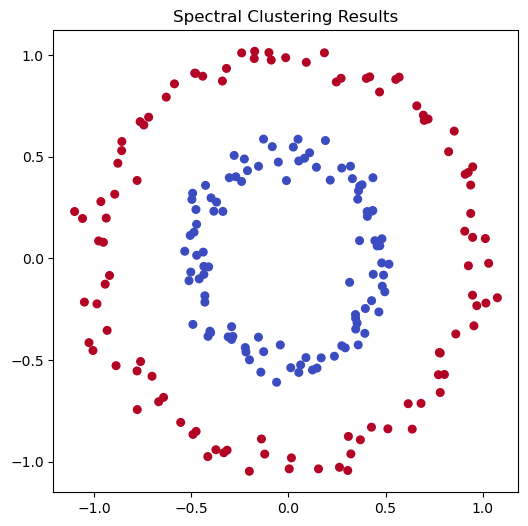

In [6]:
# Do spectral clustering 
from sklearn.cluster import SpectralClustering

# Perform spectral clustering
spectral = SpectralClustering(n_clusters=2, n_components=2, affinity='nearest_neighbors', n_neighbors=10, random_state=0)

spectral.fit(X)

# Plot the results of spectral clustering
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:, 0], X[:, 1], c=spectral.labels_, cmap='coolwarm', s=30)
ax.set_title('Spectral Clustering Results')